# 07_04: Yearly Top Ten Names

In [3]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
pd.options.display.max_rows = 10

In [5]:
allyears = pd.read_csv('allyears.csv.gz')

In [6]:
allyears_byyear = allyears.set_index(['sex','year']).sort_index()

In [7]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False)

name  number
sex year                 
M   2018     Liam   19837
    2018     Noah   18267
    2018  William   14516
    2018    James   13525
    2018   Oliver   13389
...           ...     ...
    2018   Gaylon       5
    2018   Gavynn       5
    2018    Gavon       5
    2018   Gaurav       5
    2018    Zzyzx       5

[14004 rows x 2 columns]

In [8]:
allyears_byyear.loc['M',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2018      Liam   19837
    2018      Noah   18267
    2018   William   14516
    2018     James   13525
    2018    Oliver   13389
    2018  Benjamin   13381
    2018    Elijah   12886
    2018     Lucas   12585
    2018     Mason   12435
    2018     Logan   12352

In [9]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10)

name  number
sex year                   
F   2018       Emma   18688
    2018     Olivia   17921
    2018        Ava   14924
    2018   Isabella   14464
    2018     Sophia   13928
    2018  Charlotte   12940
    2018        Mia   12642
    2018     Amelia   12301
    2018     Harper   10582
    2018     Evelyn   10376

In [10]:
allyears_byyear.loc['F',2018].sort_values('number', ascending=False).head(10).reset_index().name

0         Emma
1       Olivia
2          Ava
3     Isabella
4       Sophia
5    Charlotte
6          Mia
7       Amelia
8       Harper
9       Evelyn
Name: name, dtype: object

In [11]:
# get the top ten names for sex and year

def getyear(sex, year):
    return (allyears_byyear.loc[sex, year]             # select M/F, year
               .sort_values('number', ascending=False) # sort by most common
               .head(10)                               # only ten
               .reset_index()                          # lose the index
               .name)                                  # return a name-only Series

In [12]:
# create DataFrame with columns given by top ten name Series for range of years
pd.DataFrame({year: getyear('M',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [13]:
pd.DataFrame({year: getyear('F',year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [14]:
# similar to plotname in 07_03_popularity, but using a query on unindexed data
def plotname(sex, name):
    data = allyears.query('sex == @sex and name == @name')
    
    pp.plot(data.year, data.number, label=name)
    pp.axis(xmin=1880, xmax=2018)

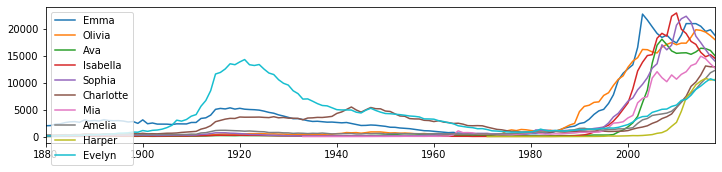

In [15]:
pp.figure(figsize=(12,2.5))

for name in getyear('F',2018):
    plotname('F', name)

pp.legend()

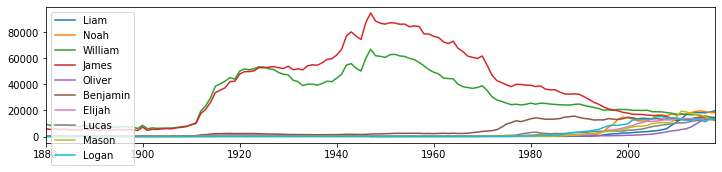

In [16]:
pp.figure(figsize=(12,2.5))

for name in getyear('M',2018):
    plotname('M', name)

pp.legend()

In [17]:
list(getyear('M',2018))

['Liam',
 'Noah',
 'William',
 'James',
 'Oliver',
 'Benjamin',
 'Elijah',
 'Lucas',
 'Mason',
 'Logan']

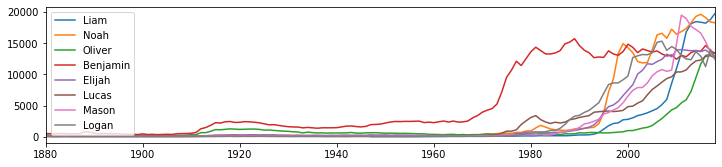

In [28]:
pp.figure(figsize=(12,2.5))

for name in ['Liam','Noah','Oliver','Benjamin','Elijah','Lucas','Mason','Logan']:
    plotname('M', name)

pp.legend()

In [18]:
# get all time favorites: select F, group by name, sum over years, sort, cap 
alltime_f = allyears_byyear.loc['F'].groupby('name').sum().sort_values('number', ascending=False).head(10)

In [19]:
alltime_f

,number
name,
Mary,4125675
Elizabeth,1638349
Patricia,1572016
Jennifer,1467207
Linda,1452668
Barbara,1434397
Margaret,1248985
Susan,1121703
Dorothy,1107635


In [20]:
alltime_f.index

Index(['Mary', 'Elizabeth', 'Patricia', 'Jennifer', 'Linda', 'Barbara',
       'Margaret', 'Susan', 'Dorothy', 'Sarah'],
      dtype='object', name='name')

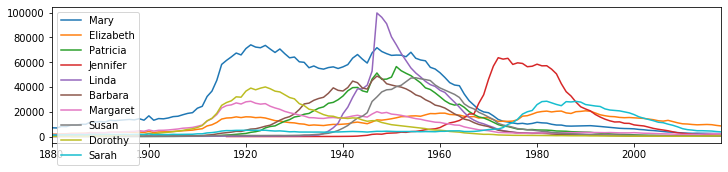

In [21]:
pp.figure(figsize=(12,2.5))

for name in alltime_f.index:
    plotname('F', name)

pp.legend()